In [29]:
import pandas as pd
import folium as fl
import webbrowser
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('../raw_files/meds_train_alunos.csv')
df

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
0,6604,-103.705,-110.425,-107.381.666.666.667,-110.33,-108.345,-106.59,-107.153.333.333.333,-102.12,-115.0,5.0,3.0,2.0,-8.055.786,-34.951.505,True
1,5515,-105.225,-115.0,-105.21,-115.0,-105.835,-115.0,-88.47,-940.242.857.142.857,-108.12,5.0,3.0,2.0,-8.055.784,-34.951.608,True
2,5049,-102.61,-115.0,-101.38,-115.0,-104.295,-97.36,-96.98,-995.725,-115.0,5.0,3.0,2.0,-8.055.506,-34.951.693,True
3,8737,-89.14,-972.514.285.714.286,-866.428.571.428.571,-960.366.666.666.667,-965.925,-92.46,-868.133.333.333.333,-102.688,-87.27,4.0,7.0,2.0,-805.039,-3.495.963,False
4,1203,-109.088.333.333.333,-107.2,-107.01,-108.43,-104.845.714.285.714,-101.435.714.285.714,-103.065,-102.11,-115.0,5.0,3.0,2.0,-805.538,-34.951.736,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,5734,-105.225,-115.0,-105.21,-115.0,-105.835,-115.0,-93.005,-971.142.857.142.857,-108.12,5.0,3.0,2.0,-8.055.784,-34.951.608,True
6771,5191,-105.225,-115.0,-105.21,-115.0,-105.835,-115.0,-87.315,-8.873.571.428.571.430,-108.12,5.0,3.0,2.0,-8.055.784,-34.951.608,True
6772,5390,-105.225,-115.0,-105.21,-115.0,-105.835,-115.0,-95.165,-9.070.571.428.571.430,-108.12,5.0,3.0,2.0,-8.055.784,-34.951.608,True
6773,860,-109.088.333.333.333,-107.2,-107.01,-108.43,-97.2,-9.814.857.142.857.140,-99.84,-94.665,-115.0,5.0,3.0,2.0,-805.538,-34.951.736,True


In [31]:
# Remova os pontos e converta as strings para float
df['lat'] = df['lat'].str.replace('.', '').astype(float) / 1e6
df['lon'] = df['lon'].str.replace('.', '').astype(float) / 1e6

In [32]:
mapa_base = fl.Map(location=[df.iloc[0]['lat'], df.iloc[0]['lon']], zoom_start=13)

# Itere sobre o dataframe e adicione cada ponto ao mapa
for _, row in df.iterrows():
    fl.Marker(
        location=[row['lat'], row['lon']],
        popup=str(row['ponto_id'])  # isso irá exibir o ponto_id quando você clicar no marcador
    ).add_to(mapa_base)


In [33]:
# Visualize o mapa
mapa_base.save("mapa.html")

In [34]:
webbrowser.open("mapa.html", new=2)

True

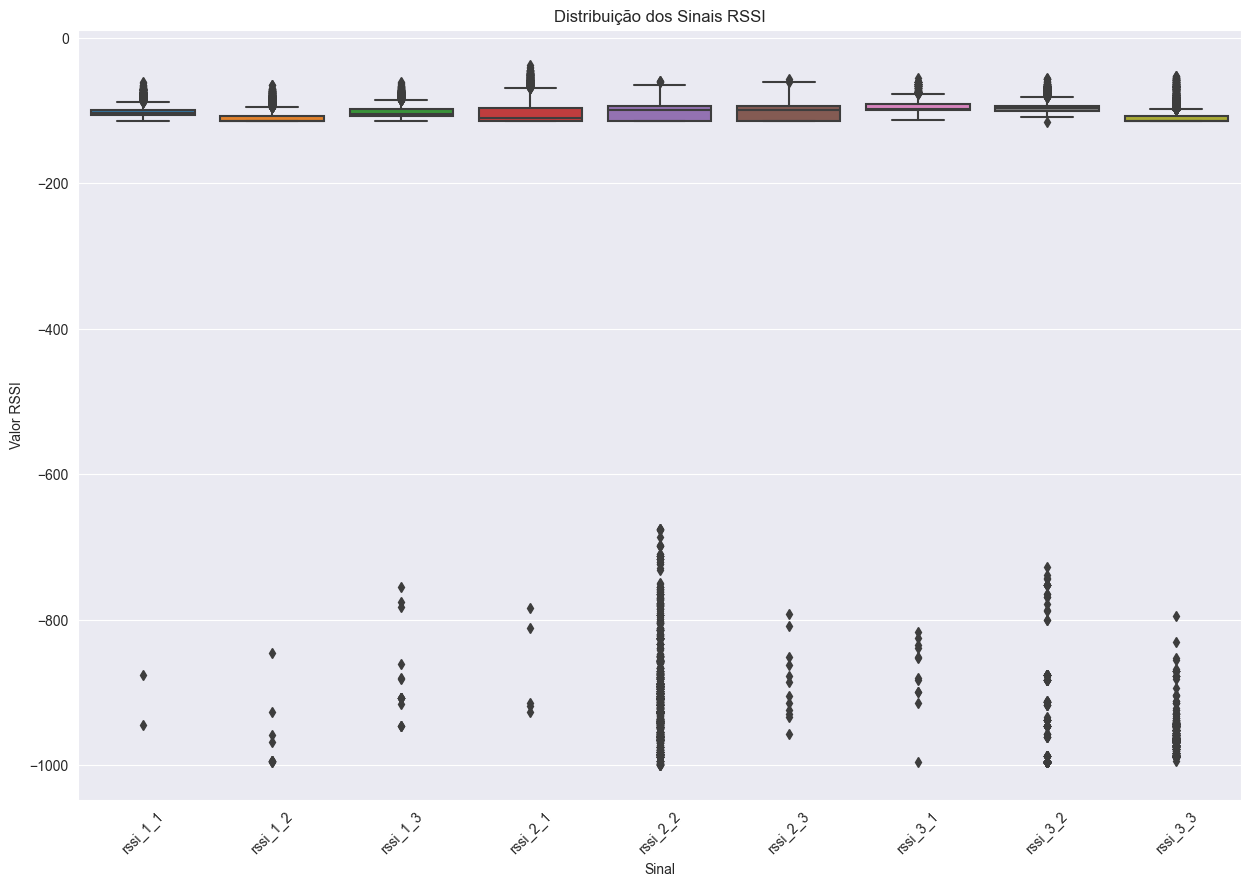

In [35]:
# Lista das colunas de sinais
sinal_cols = [
    'rssi_1_1', 'rssi_1_2', 'rssi_1_3', 'rssi_2_1', 'rssi_2_2',
    'rssi_2_3', 'rssi_3_1', 'rssi_3_2', 'rssi_3_3'
]
# Converter cada coluna em sinal_cols para numérico
for col in sinal_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Criar boxplot para todas as colunas juntas
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[sinal_cols])
plt.xticks(rotation=45)  # Rotaciona os nomes das colunas para melhor visualização
plt.title('Distribuição dos Sinais RSSI')
plt.ylabel('Valor RSSI')
plt.xlabel('Sinal')
plt.show()


In [36]:
nan_counts = df[sinal_cols].isnull().count()
print(nan_counts)
for col in sinal_cols:
    if col not in df.columns:
        print(f"Coluna {col} não encontrada!")

rssi_1_1    6775
rssi_1_2    6775
rssi_1_3    6775
rssi_2_1    6775
rssi_2_2    6775
rssi_2_3    6775
rssi_3_1    6775
rssi_3_2    6775
rssi_3_3    6775
dtype: int64


C:\Users\betin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


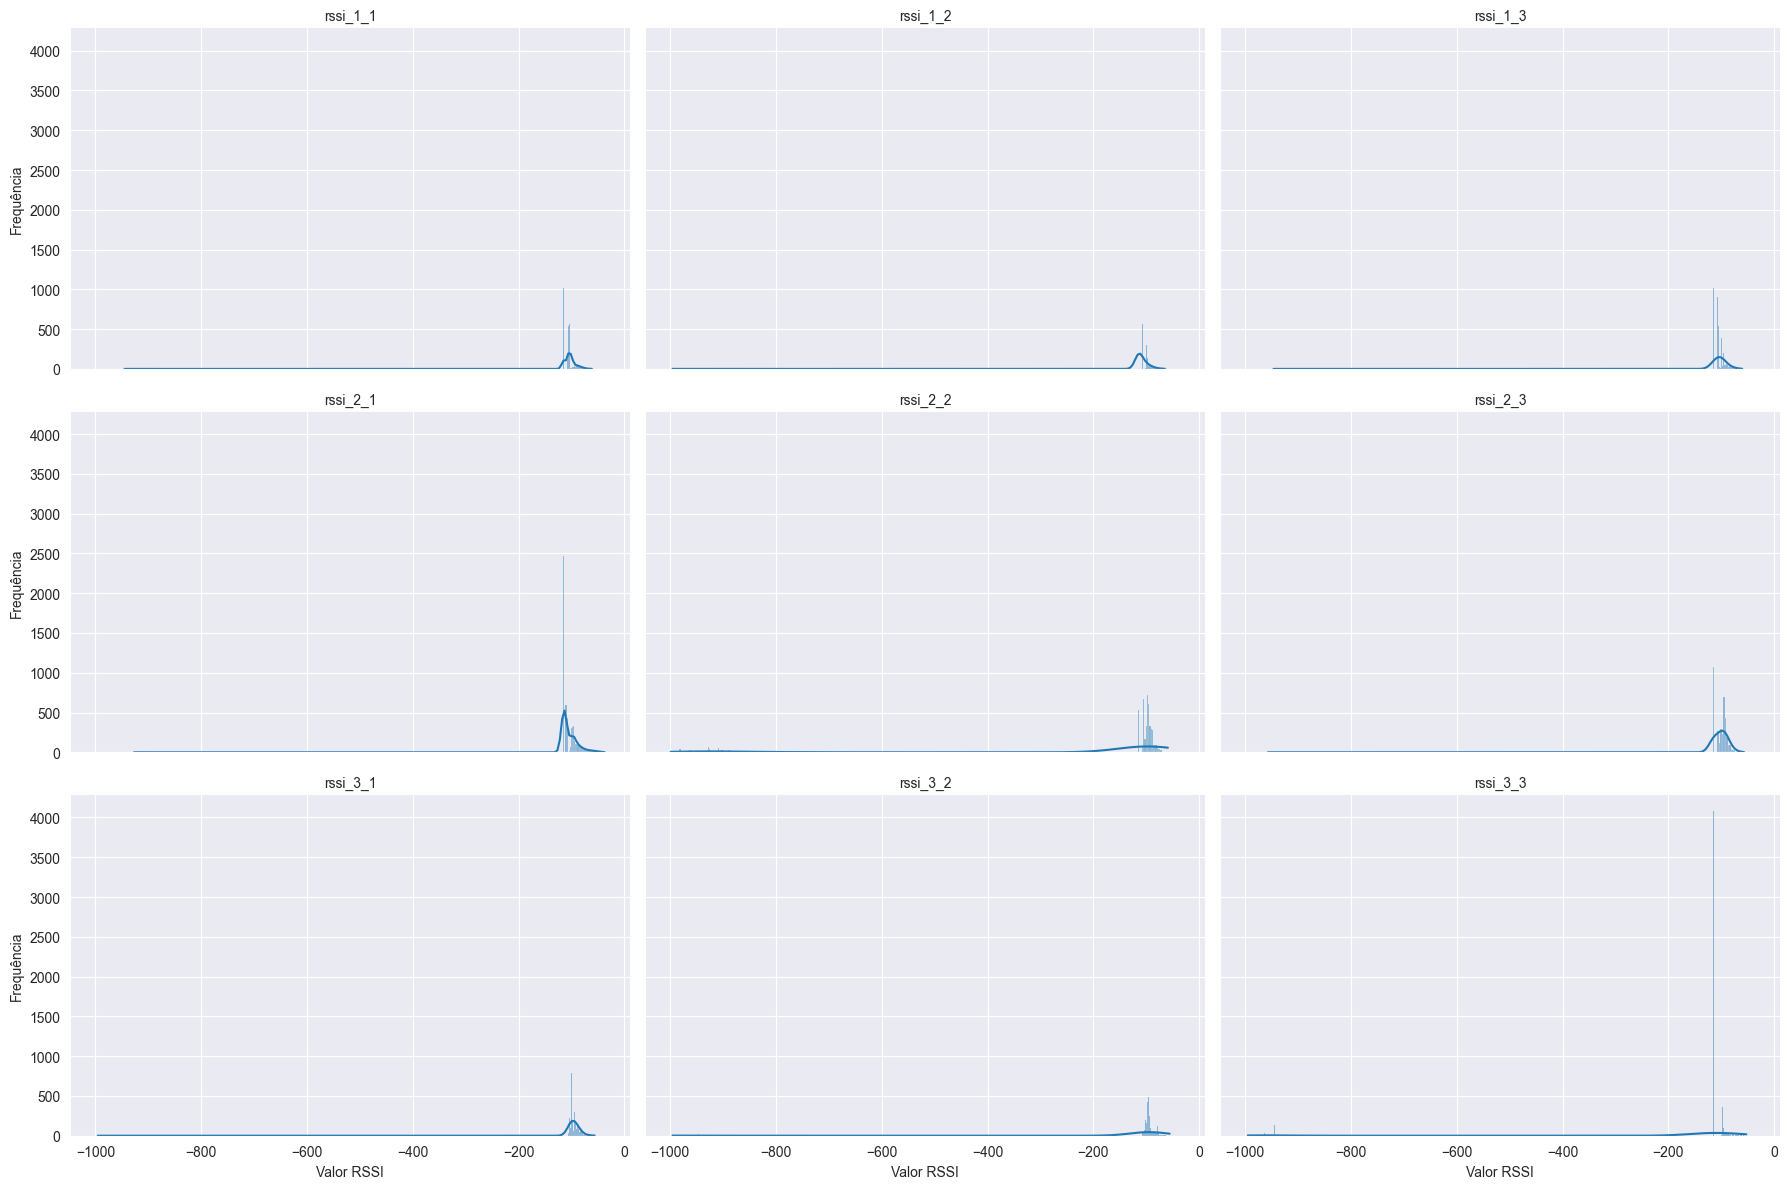

In [39]:
# Derreter o DataFrame para torná-lo longo
df_melted = df.melt(value_vars=sinal_cols, var_name='Sinal', value_name='Valor RSSI')

g = sns.FacetGrid(df_melted, col="Sinal", col_wrap=3, sharex=True, sharey=True, height=4, aspect=1.5)
g.map(sns.histplot, "Valor RSSI", kde=True)

g.set_axis_labels("Valor RSSI", "Frequência")
g.set_titles(col_template="{col_name}")
g.tight_layout()
plt.show()
